In [6]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [7]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 output units for 10 classes
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=3)

In [9]:
history = model.fit(train_images, train_labels, epochs=20, validation_split=0.1, callbacks=[early_stopping])

Epoch 1/20
1688/1688 [==============================] - 7s 4ms/step - loss: 0.1312 - accuracy: 0.9603 - val_loss: 0.0481 - val_accuracy: 0.9865
Epoch 2/20
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0428 - accuracy: 0.9866 - val_loss: 0.0381 - val_accuracy: 0.9895
Epoch 3/20
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0280 - accuracy: 0.9909 - val_loss: 0.0388 - val_accuracy: 0.9908
Epoch 4/20
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0196 - accuracy: 0.9936 - val_loss: 0.0400 - val_accuracy: 0.9898
Epoch 5/20
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0131 - accuracy: 0.9960 - val_loss: 0.0423 - val_accuracy: 0.9888


In [10]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

313/313 [==============================] - 0s 1ms/step - loss: 0.0365 - accuracy: 0.9888
Test accuracy: 0.9887999892234802


313/313 [==============================] - 0s 1ms/step


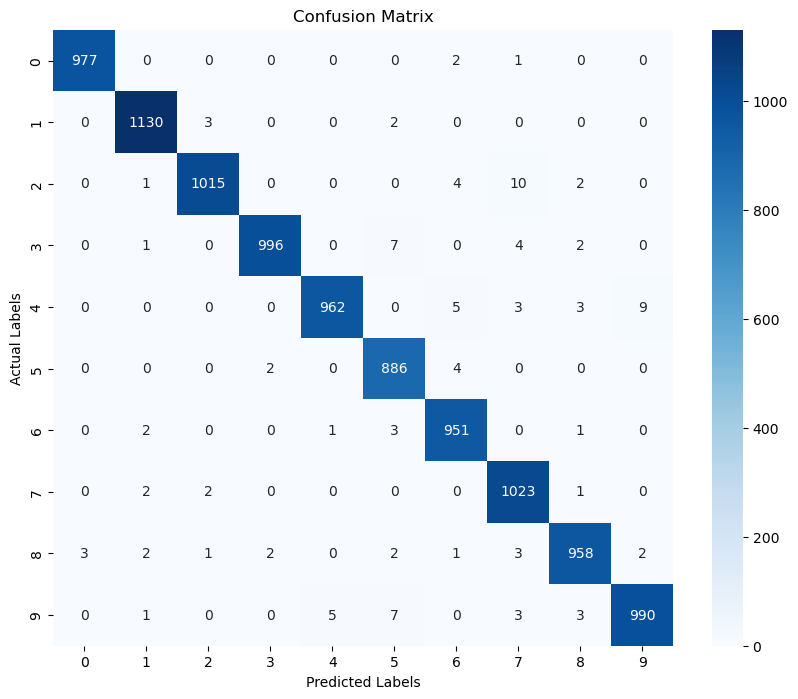

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Model
from sklearn.metrics import confusion_matrix

# Predict the test set
predictions = model.predict(test_images)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(test_labels, axis=1)
conf_matrix = confusion_matrix(true_classes, predicted_classes)

# Plotting the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.title('Confusion Matrix')
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.show()

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 flatten (Flatten)           (None, 7744)              0         
                                                                 
 dense (Dense)               (None, 64)                495680    
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                        

# Table for hyperparameters

| Hyperparameter | Values |
|----------------|--------|
| Activation Function | Relu, SoftMAx|
| Weight Initializer | he_normal |
| Number of hidden layers | 2 |
| Number of neurons in hidden layers | 32+64+64 = 160 |
| Loss Function | categorical_crossentropy |
| Optimizer | adam |
| Number of Epochs | 20 |
| Learning Rate  | 0.001  |
| Batch Size     | 32     |
| Evaluation Metrics | Accuracy |


